## Image Data Analysis

### Read example image with cv2

In [191]:
from cv2 import imdecode, IMREAD_UNCHANGED
import json
import requests
import numpy as np

all_data = json.load(open('./merged.json'))

def get_image_data(img_url):
    get_image = requests.get(img_url, stream=True)
    raw_image_data = get_image.raw
    image_array = np.asarray(bytearray(raw_image_data.read()), dtype="uint8")
    image_data = imdecode(image_array, IMREAD_UNCHANGED)
    return image_data


In [192]:
height, width, num_channels = get_image_data(all_data['001']['sprites'][0]).shape
(height, width, num_channels)

(120, 120, 3)

In [193]:
from urllib.parse import urlparse

def apply_transformation(data):
    try:
        res = json.load(open('./post_transformation.json'))
    except Exception:
        res = {}
    for ndex in list(data.keys())[:6]:
        res[ndex] = data[ndex].copy()
        sprites = data[ndex]['sprites']
        sprites_with_metadata = {}
        for sprite_url in list(sprites)[:4]:
            if sprite_url not in res.get(ndex, {}).get('sprites', {}):
                print(f'fetching {sprite_url}')
                try:
                    image_data = get_image_data(sprite_url)
                    ext = sprite_url.split('.')[-1].lower().strip()
                    if ((image_data is None) or (image_data.shape is None)):
                        print(f'found svg for {ndex}:{sprite_url}')
                        height = width = num_channels = 'inf'
                    else:
                        height, width, *rest = image_data.shape
                        num_channels = rest[0] if rest else 0
                    res[ndex]['sprites'][sprite_url] = {
                        # 'url': sprite_url,
                        'height': height,
                        'width': width,
                        'num_channels': num_channels,
                        'ext': ext,
                        'domain': urlparse(sprite_url).netloc
                    }
                except Exception as e:
                    print(f'error capturing {ndex}:{sprite_url}')
                    print(e)
            else:
                print(f'skipping {sprite_url}')
        # res[ndex]['sprites'] = sprites_with_metadata
    return res
    

In [194]:
updated_image_data = apply_transformation(all_data)
json.dump(updated_image_data, open('post_transformation.json', 'w'), indent=4)

skipping https://archives.bulbagarden.net/media/upload/thumb/4/48/Build-A-Bear_PokemonPartyTShirt.png/120px-Build-A-Bear_PokemonPartyTShirt.png
skipping https://archives.bulbagarden.net/media/upload/3/38/Spr_b_2c_001_s.png
skipping https://archives.bulbagarden.net/media/upload/b/b6/Spr_1y_001.png
skipping https://archives.bulbagarden.net/media/upload/7/75/001_s.png
skipping https://archives.bulbagarden.net/media/upload/thumb/1/11/Ivysaur_04_018.png/120px-Ivysaur_04_018.png
skipping https://archives.bulbagarden.net/media/upload/d/dd/Menu_Colo_002.png
skipping https://archives.bulbagarden.net/media/upload/thumb/c/c1/002Ivysaur_RB.png/120px-002Ivysaur_RB.png
skipping https://archives.bulbagarden.net/media/upload/thumb/e/e4/Spr_b_7s_002_s.png/120px-Spr_b_7s_002_s.png
skipping https://archives.bulbagarden.net/media/upload/thumb/9/97/Bandai_Jumbo4_Stickers.jpg/120px-Bandai_Jumbo4_Stickers.jpg
skipping https://archives.bulbagarden.net/media/upload/6/60/Spr_b_4d_003_m.png
skipping https://arch

In [190]:
from collections import Counter

domain_counter = Counter()
ext_counter = Counter()

for ndex in list(updated_image_data.keys())[:4]:
    pokemon_data = updated_image_data[ndex]
    for sprite in pokemon_data['sprites']:
        domain_counter[sprite['domain']] += 1
        ext_counter[sprite['ext']] += 1

print(domain_counter)
print(ext_counter)

TypeError: string indices must be integers

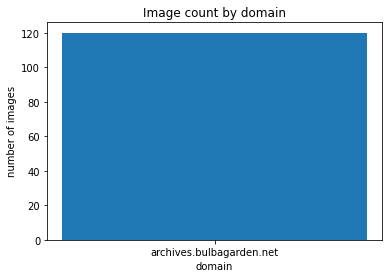

In [54]:
import matplotlib.pyplot as plt

plt.title('Image count by domain')
plt.xlabel('domain')
plt.ylabel('number of images')
for domain, count in domain_counter.items():
    plt.bar(domain, count)


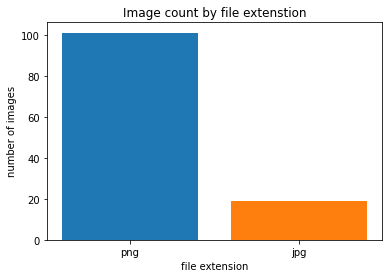

In [55]:
plt.title('Image count by file extenstion')
plt.xlabel('file extension')
plt.ylabel('number of images')
for ext, count in ext_counter.items():
    plt.bar(ext, count)